In [54]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

def month_int_time(a):
    """
    从2015-1-1开始当前为第sum个月
    :param a:
    :return:
    """
    month = int(a['MONTH'].split('-')[1]) - 1
    year = (int(a['MONTH'].split('-')[0]) - 2015 ) * 12
    sum = year + month
    return sum

def del_PART_ORDER():
    """
    读取处理数据
    :return:
    """
    PART_ORDER = "resources/PART_ORDER.csv"
    part_order = pd.read_csv(PART_ORDER).fillna(0)


    part_order['MONTH'] = pd.to_datetime(part_order['MONTH']).dt.strftime('%Y-%m-%d')
    # part_order['MONTH_INT'] = part_order.apply(month_int_time, axis=1)
    # 去重
    # part_order = part_order.drop_duplicates(subset=['PART_NO', 'MONTH_INT'], keep='last')
    part_order = part_order.drop_duplicates(subset=['PART_NO', 'MONTH'], keep='last')
    # 排序
    # part_order = part_order.sort_values(by='MONTH')


    return part_order

def del_PART_LIST():

    PART_LIST = "resources/PART_LIST.csv"
    part_list = pd.read_csv(PART_LIST, encoding="GBK")
    part_list['PIDT'] = pd.to_datetime(part_list['PIDT']).dt.strftime('%Y-%m-%d')
    # ONEHOT_COLUMNS = ['CAR_CLASS', 'REPAIR_TYPE', 'TYPE_CODE', 'CONSTRUCT_NAME']

    # DROP = ['KPDS', 'PIDT']
    # for column in ONEHOT_COLUMNS:
    #     part_list = hot_coding_dispose(part_list, column)

    # part_list = part_list.drop(columns=DROP)
    # 去重
    part_list = part_list.drop_duplicates(['PART_NO'],keep='last')

    return part_list

def del_TESTDATA_ID():
    TESTDATA_ID = "resources/testdata_id.txt"

    part_predict_list = []
    with open(TESTDATA_ID, 'r') as f:
        for part in f.readlines():
            part_predict_list.append(part[:-1])

    return part_predict_list

In [55]:
part_order = del_PART_ORDER()
part_list = del_PART_LIST()
part_predict_list = del_TESTDATA_ID()

In [8]:
# 零部件信息内容
print('PART_NO个数:' + str(len(part_list['PART_NO'].unique())))
print('KPDS个数:' + str(len(part_list['KPDS'].unique())))
print('CAR_CLASS个数:' + str(len(part_list['CAR_CLASS'].unique())))
print('PIDT个数:' + str(len(part_list['PIDT'].unique())))
print('REPAIR_TYPE个数:' + str(len(part_list['REPAIR_TYPE'].unique())))
print('TYPE_CODE个数:' + str(len(part_list['TYPE_CODE'].unique())))
print('CONSTRUCT_NAME个数:' + str(len(part_list['CONSTRUCT_NAME'].unique())))


PART_NO个数:2289
KPDS个数:1220
CAR_CLASS个数:6
PIDT个数:267
REPAIR_TYPE个数:4
TYPE_CODE个数:12
CONSTRUCT_NAME个数:10


In [9]:
# 零部件销售整体数据分析
import numpy as np

description = [part_order.min(), part_order.max(), part_order.mean(), part_order.std()]  # 依次计算最小值、最大值、均值、标准差
description = pd.DataFrame(description, index = ['Min', 'Max', 'Mean', 'STD']).T  # 将结果存入数据框
print('描述性统计结果：\n',np.round(description, 2))  # 保留两位小数


描述性统计结果：
                       Min         Max        Mean          STD
PART_NO        01096576N9  99H98XF9KL         NaN          NaN
MONTH          2021-12-01  2021-12-01         NaN          NaN
DM01                  0.0     22766.0  184.052425  1150.327774
REPAIR_CNT            0.0     13326.0   83.129314    603.46531
REPAIR_AMOUNT         0.0     15416.0  110.974661     733.4092
RUN_DIST              0.0    73865.98  544.140564  2918.179364


相关系数矩阵为：
                  DM01  REPAIR_CNT  REPAIR_AMOUNT  RUN_DIST
DM01           1.0000      0.8731         0.9907    0.8540
REPAIR_CNT     0.8731      1.0000         0.9113    0.9204
REPAIR_AMOUNT  0.9907      0.9113         1.0000    0.8878
RUN_DIST       0.8540      0.9204         0.8878    1.0000


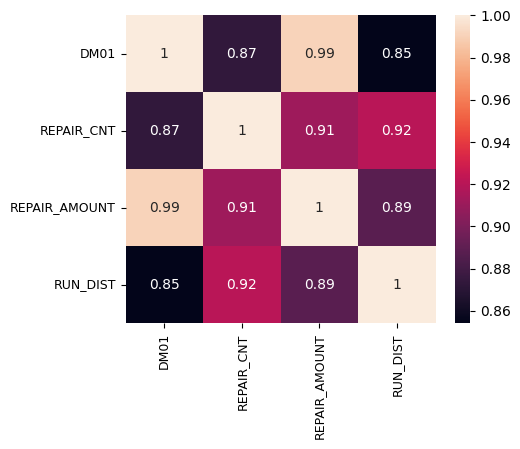

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 相关性分析
corr = part_order.corr(method = 'pearson')  # 计算相关系数矩阵
print('相关系数矩阵为：\n',np.round(corr, 4))  # 保留4位小数
#=======绘制热图===============
plt.figure(figsize=(5,4))
sns.heatmap(corr , annot=True)
# 设置刻度字体大小
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

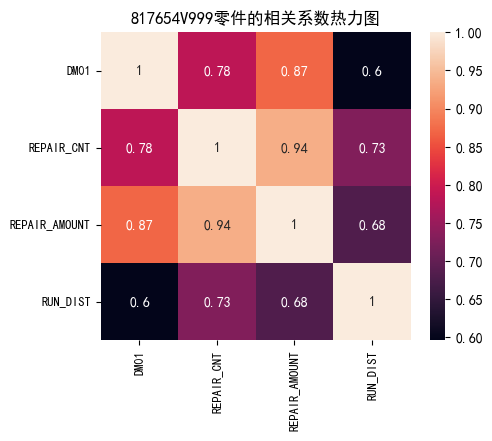

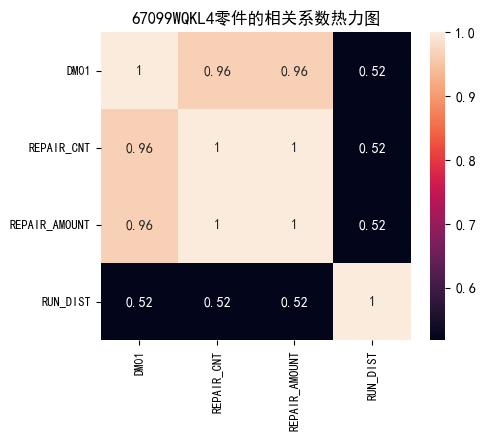

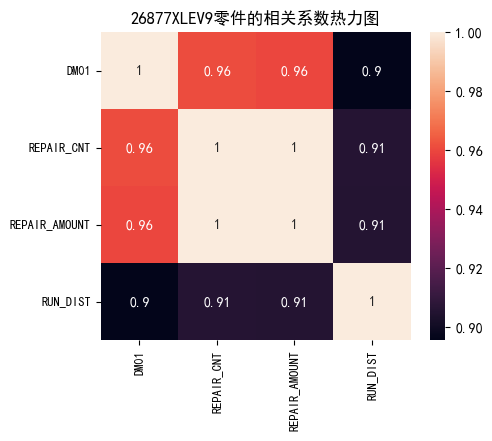

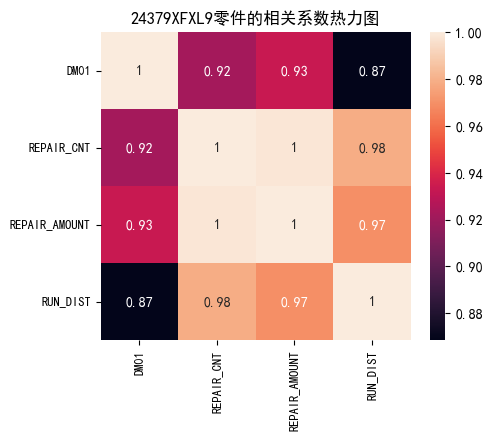

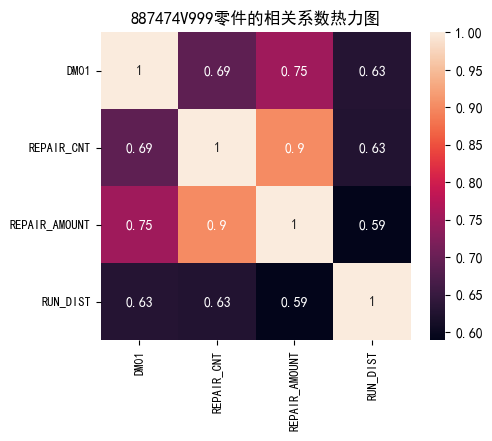

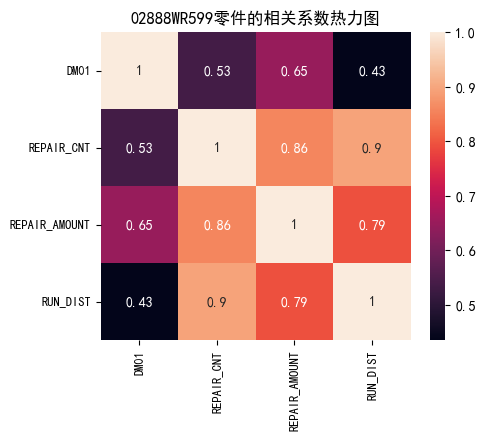

In [58]:
# 随机绘制n个零件的相关性
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

for i in range(6):
    import random
    index = random.randint(0,len(part_predict_list))
    df = part_order[part_order['PART_NO']==part_predict_list[index]]
    # 相关性分析
    corr = df.corr(method = 'pearson')  # 计算相关系数矩阵
    # print(str(part_predict_list[index])+'零件的相关系数矩阵为：\n',np.round(corr, 4))  # 保留4位小数

    #=======绘制热图===============
    plt.figure(figsize=(5,4))
    sns.heatmap(df.corr() , annot=True)
    # 设置刻度字体大小
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.title(str(part_predict_list[index])+'零件的相关系数热力图')
plt.show()


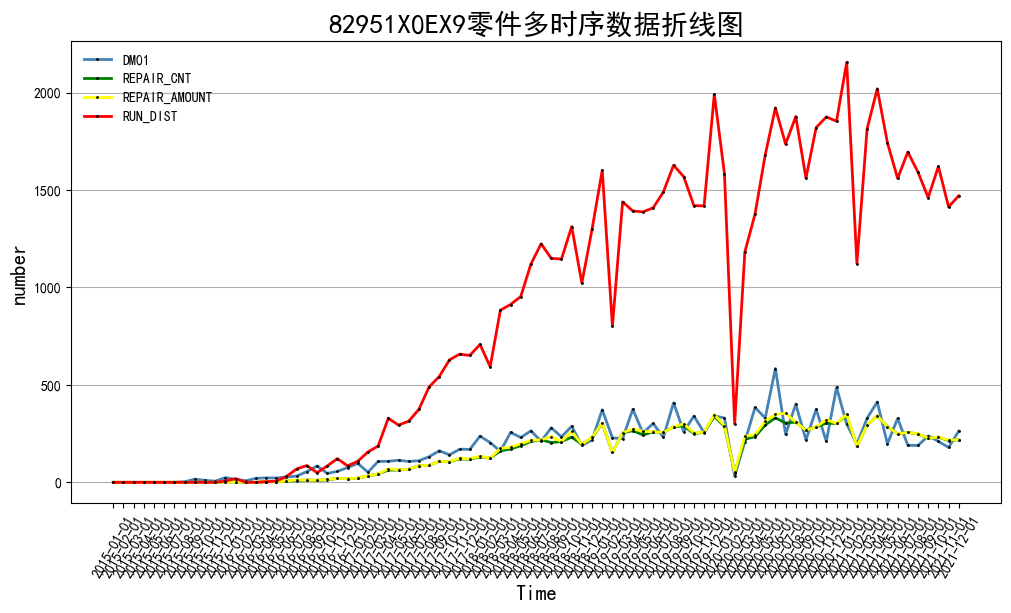

In [76]:
#绘制

# 零件的时间曲线图
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
index = random.randint(0,len(part_predict_list))
df = part_order[part_order['PART_NO']==part_predict_list[index]]
# df=df.sort_values(by='MONTH_INT')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

feas=['DM01','REPAIR_CNT','REPAIR_AMOUNT','RUN_DIST']
# feas=['DM01','REPAIR_CNT','REPAIR_AMOUNT']
color=['steelblue','green','yellow','red']
# color=['steelblue','green','yellow']
x = df['MONTH']
# 设置图框的大小
fig = plt.figure(figsize=(12, 6))

for i in range(len(feas)):
    # 绘图，做折线图
    plt.plot(x,  # x轴
             df[feas[i]],  # y轴
             linestyle='-',  # 折线类型
             linewidth=2,  # 折线宽度
             color=color[i],  # 折线颜色
             marker='o',  # 点的形状
             markersize=1,  # 点的大小
             markeredgecolor='black',  # 点的边框色
             markerfacecolor='steelblue',  # 点的填充色
             label=feas[i]  # 标签
             )

# 添加标题和坐标轴标签
plt.title(str(part_predict_list[index])+'零件多时序数据折线图', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('number', fontsize=15)
plt.xticks(rotation=60)  # x轴标签倾斜60度

plt.legend(loc='best', frameon=False)  # 图例，显示label，去掉边框
plt.grid(axis="y")
plt.show()
